## What is the most optimal skill to learn for Data Analysts?
Methodology
- Continue from last notebook to find percent of postings with skill
- Visualize median salary vs percent skill demand
- (Optional) Determine if certain technologies are more prevalent

In [1]:
import ast
import pandas as pd
import seaborn as sns 
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else None)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_explode[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [8]:
df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [27]:
df_technology = df['job_type_skills'].copy()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))



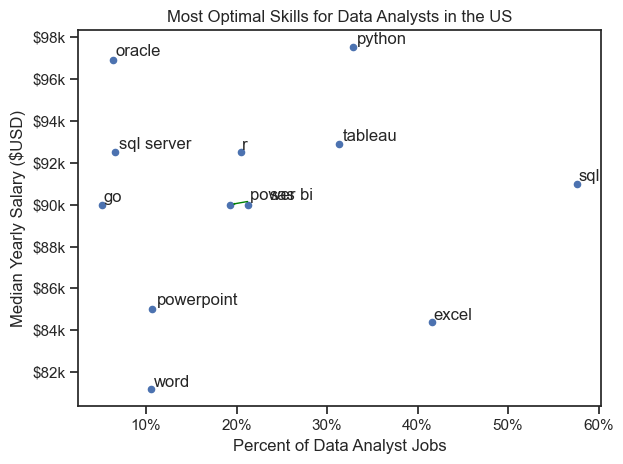

In [28]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')


texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], skill))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#Set axis labels, title, and legend
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [21]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,qlik
0,analyst_tools,sheets
0,analyst_tools,splunk
0,analyst_tools,dax
...,...,...
9,sync,ringcentral
9,sync,webex
9,sync,microsoft teams
9,sync,unify


In [24]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

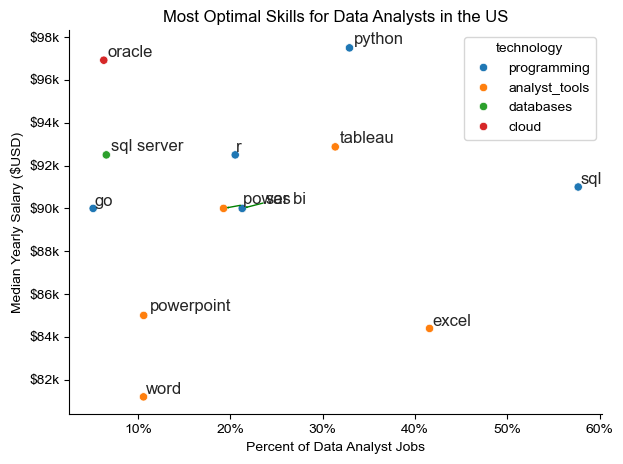

In [26]:
from adjustText import adjust_text

# df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)


sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, skill in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], skill))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#Set axis labels, title, and legend
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()